In [1]:
from MLP import MPLArgs, splitDataSet, trainModel, predict
from MLPComparator import MLPComparator

In [2]:
mlp = MPLArgs(**{"steps":[1, 2],
        "dataset":"../data/data.csv",
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":200,
        "resetTraining":True
        })

# Test avec plusieurs learning rates

In [3]:
mlp2 = MPLArgs(**{"steps":[2],
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":200,
        "learningRate":0.1,
        "resetTraining":True
        })

In [4]:
mlp3 = MPLArgs(**{"steps":[2],
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":350,
        "learningRate":0.015,
        "resetTraining":True
        })

In [5]:
splitDataSet(mlp)
trainModel(mlp)

Splitting the dataset:
     x_train shape : (455, 30)
     x_valid shape : (114, 30)
Saving training set in data_train.csv
Saving validation set in data_val.csv

Creating new Neural Network:
----------- Layer 1 -----------
Layer Name: Dense 1
Shape W: (30, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 2 -----------
Layer Name: Dense 2
Shape W: (8, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 3 -----------
Layer Name: Dense 3
Shape W: (8, 2)
Shape b: (1, 2)
activation: softmax
weights_initializer: heUniformWI 

epoch 1/200 : accuracy: 63.74%, loss: 0.642, val_accuracy: 61.4%, val_loss: 0.647
epoch 2/200 : accuracy: 66.37%, loss: 0.621, val_accuracy: 64.04%, val_loss: 0.623
epoch 3/200 : accuracy: 65.27%, loss: 0.595, val_accuracy: 63.16%, val_loss: 0.6
epoch 4/200 : accuracy: 69.23%, loss: 0.573, val_accuracy: 64.91%, val_loss: 0.576
epoch 5/200 : accuracy: 73.41%, loss: 0.552, val_accuracy: 73.

In [6]:
trainModel(mlp2)

Creating new Neural Network:
----------- Layer 1 -----------
Layer Name: Dense 1
Shape W: (30, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 2 -----------
Layer Name: Dense 2
Shape W: (8, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 3 -----------
Layer Name: Dense 3
Shape W: (8, 2)
Shape b: (1, 2)
activation: softmax
weights_initializer: heUniformWI 

epoch 1/200 : accuracy: 63.3%, loss: 0.598, val_accuracy: 60.53%, val_loss: 0.608
epoch 2/200 : accuracy: 90.33%, loss: 0.539, val_accuracy: 92.11%, val_loss: 0.53
epoch 3/200 : accuracy: 81.98%, loss: 0.457, val_accuracy: 83.33%, val_loss: 0.454
epoch 4/200 : accuracy: 90.11%, loss: 0.396, val_accuracy: 90.35%, val_loss: 0.388
epoch 5/200 : accuracy: 91.87%, loss: 0.347, val_accuracy: 95.61%, val_loss: 0.334
epoch 6/200 : accuracy: 92.53%, loss: 0.306, val_accuracy: 95.61%, val_loss: 0.292
epoch 7/200 : accuracy: 92.97%, loss: 0.273, val_accuracy

In [7]:
trainModel(mlp3)

Creating new Neural Network:
----------- Layer 1 -----------
Layer Name: Dense 1
Shape W: (30, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 2 -----------
Layer Name: Dense 2
Shape W: (8, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 3 -----------
Layer Name: Dense 3
Shape W: (8, 2)
Shape b: (1, 2)
activation: softmax
weights_initializer: heUniformWI 

epoch 1/350 : accuracy: 57.58%, loss: 0.686, val_accuracy: 57.02%, val_loss: 0.68
epoch 2/350 : accuracy: 64.84%, loss: 0.648, val_accuracy: 63.16%, val_loss: 0.65
epoch 3/350 : accuracy: 64.18%, loss: 0.632, val_accuracy: 61.4%, val_loss: 0.637
epoch 4/350 : accuracy: 64.4%, loss: 0.62, val_accuracy: 61.4%, val_loss: 0.625
epoch 5/350 : accuracy: 65.05%, loss: 0.609, val_accuracy: 63.16%, val_loss: 0.614
epoch 6/350 : accuracy: 65.93%, loss: 0.599, val_accuracy: 64.04%, val_loss: 0.602
epoch 7/350 : accuracy: 67.03%, loss: 0.588, val_accuracy: 64

In [8]:
savedModel_learningRate = MLPComparator()
savedModel_learningRate.addNewModel(mlp)
savedModel_learningRate.addNewModel(mlp2)
savedModel_learningRate.addNewModel(mlp3)

Model 1:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.0314, batch size: 8

Model 2:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.1, batch size: 8

Model 3:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.015, batch size: 8




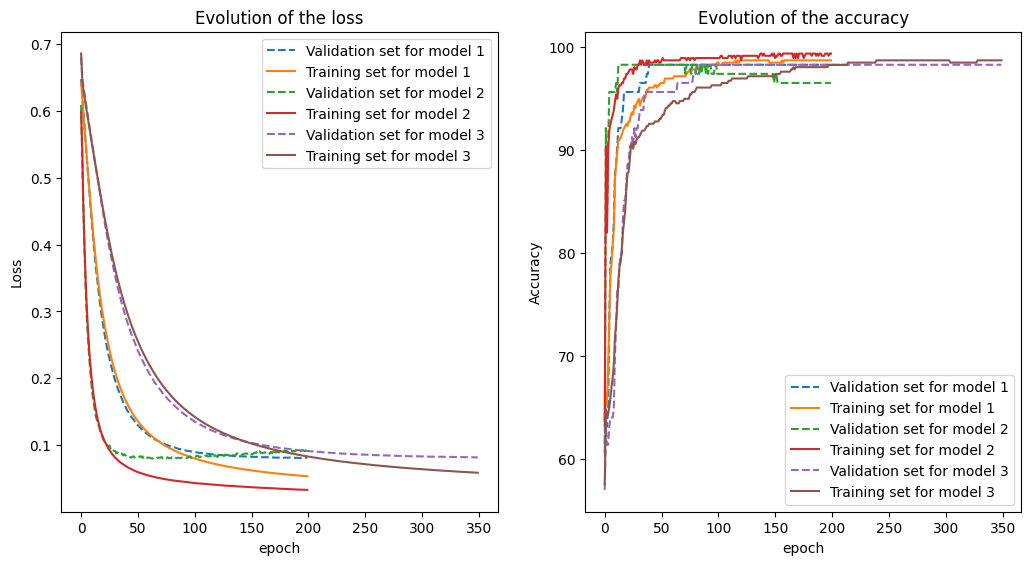

In [9]:
savedModel_learningRate.printComparisonGraphs()

Le model 2 n'est pas bon car la loss du validation set remonte. Les models 1 et 3 convergent vers la meme valeur mais le model 1 est plus rapide pour converger. 

=> On reste sur un learning rate de 0.0314

# Test de differentes tailles de batch

In [10]:
mlp4 = MPLArgs(**{"steps":[2],
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":200,
        "batchSize":16,
        "resetTraining":True
        })

mlp5 = MPLArgs(**{"steps":[2],
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":200,
        "batchSize":32,
        "resetTraining":True
        })

In [11]:
trainModel(mlp4)
trainModel(mlp5)

Creating new Neural Network:
----------- Layer 1 -----------
Layer Name: Dense 1
Shape W: (30, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 2 -----------
Layer Name: Dense 2
Shape W: (8, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 3 -----------
Layer Name: Dense 3
Shape W: (8, 2)
Shape b: (1, 2)
activation: softmax
weights_initializer: heUniformWI 

epoch 1/200 : accuracy: 63.74%, loss: 0.656, val_accuracy: 61.4%, val_loss: 0.661
epoch 2/200 : accuracy: 65.27%, loss: 0.643, val_accuracy: 63.16%, val_loss: 0.646
epoch 3/200 : accuracy: 63.74%, loss: 0.628, val_accuracy: 61.4%, val_loss: 0.635
epoch 4/200 : accuracy: 64.62%, loss: 0.615, val_accuracy: 62.28%, val_loss: 0.62
epoch 5/200 : accuracy: 65.49%, loss: 0.603, val_accuracy: 63.16%, val_loss: 0.607
epoch 6/200 : accuracy: 67.47%, loss: 0.59, val_accuracy: 64.91%, val_loss: 0.593
epoch 7/200 : accuracy: 68.13%, loss: 0.578, val_accuracy: 

In [12]:
savedModel_batch = MLPComparator()
savedModel_batch.addNewModel(mlp)
savedModel_batch.addNewModel(mlp4)
savedModel_batch.addNewModel(mlp5)

Model 1:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.0314, batch size: 8

Model 2:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.0314, batch size: 16

Model 3:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.0314, batch size: 32




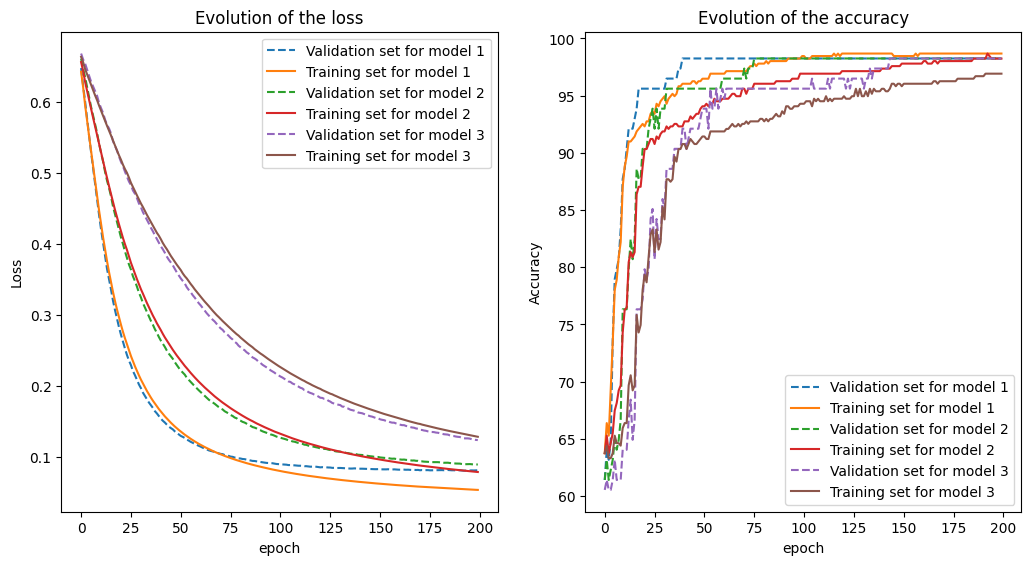

In [13]:
savedModel_batch.printComparisonGraphs()